In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata

In [2]:
df = pd.read_excel("../crawl_data/data/data_speaker.xlsx")

> Số dòng và số cột

In [3]:
df.info

<bound method DataFrame.info of            id            sku  \
0   277980303  4750768275106   
1   277820438  6626294220372   
2   277615987  5303786037377   
3   277548884  1400365236556   
4   277468981  5932807198908   
..        ...            ...   
95  271966725  2427624226182   
96  271829222  6711409169818   
97  271515346  7459828091762   
98  241638318  8606270245582   
99  241635069  6707381049590   

                                                 name  \
0   Loa Momo thông báo chuyển khoản - Tặng khay QR...   
1        Loa Bluetooth JBL Charge 6 - Hàng chính hãng   
2   Loa Bluetooth ngoài trời Xiaomi BHR4802GL | Ch...   
3   Loa vi tính để bàn SUPER BASS cực đã dòng loa ...   
4   Loa Bluetooth Mini Karaoke Không Dây, Kèm 2 Mi...   
..                                                ...   
95     Loa Bluetooth Sony SRS-XB100 - Hàng chính hãng   
96  Loa Bluetooth Mini Sothing DW13 Vintage Retro ...   
97     Loa Bluetooth Sony SRS-XB100 - Hàng Chính Hãng   
98  Loa Bluet

> Xem dữ liệu

10 dòng đầu

In [4]:
df.head(10)

,id,sku,name,url_key,url_path,type,author_name,book_cover,brand_name,short_description,...,badges_new_6_code,badges_new_6_placement,badges_new_6_text_color,badges_new_6_type,badges_new_4_arr_text_1_value,badges_new_4_promotions_1_icon,badges_new_4_promotions_1_icon_height,badges_new_4_promotions_1_icon_width,badges_new_4_promotions_1_text,visible_impression_info_amplitude_combo_deal_id
0,277980303,4750768275106,Loa Momo thông báo chuyển khoản - Tặng khay QR...,loa-momo-thong-bao-chuyen-khoan-tang-khay-qrco...,loa-momo-thong-bao-chuyen-khoan-tang-khay-qrco...,NaN,NaN,NaN,Momo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,277820438,6626294220372,Loa Bluetooth JBL Charge 6 - Hàng chính hãng,loa-bluetooth-jbl-charge-6-hang-chinh-hang-p27...,loa-bluetooth-jbl-charge-6-hang-chinh-hang-p27...,NaN,NaN,NaN,JBL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,277615987,5303786037377,Loa Bluetooth ngoài trời Xiaomi BHR4802GL | Ch...,loa-bluetooth-ngoai-troi-xiaomi-bhr4802gl-chon...,loa-bluetooth-ngoai-troi-xiaomi-bhr4802gl-chon...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,277548884,1400365236556,Loa vi tính để bàn SUPER BASS cực đã dòng loa ...,loa-vi-tinh-de-ban-super-bass-cuc-da-dong-loa-...,loa-vi-tinh-de-ban-super-bass-cuc-da-dong-loa-...,NaN,NaN,NaN,LuckyJQR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,277468981,5932807198908,"Loa Bluetooth Mini Karaoke Không Dây, Kèm 2 Mi...",loa-bluetooth-mini-karaoke-khong-day-kem-2-mic...,loa-bluetooth-mini-karaoke-khong-day-kem-2-mic...,NaN,NaN,NaN,MINIIN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,277369759,6207346077664,"Loa Bluetooth Chữ G LED RGB, Sạc Nhanh Không D...",loa-bluetooth-chu-g-led-rgb-sac-nhanh-khong-da...,loa-bluetooth-chu-g-led-rgb-sac-nhanh-khong-da...,NaN,NaN,NaN,MINIIN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,276582252,4345964729037,Loa Bluetooth Anker Soundcore 3 A3117 - Hàng c...,loa-bluetooth-anker-soundcore-3-a3117-hang-chi...,loa-bluetooth-anker-soundcore-3-a3117-hang-chi...,NaN,NaN,NaN,ANKER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,276566181,5592622754319,"Loa Máy Tính E1002 Dùng Cho Máy Tính Bàn, PC, ...",loa-may-tinh-e1002-dung-cho-may-tinh-ban-pc-la...,loa-may-tinh-e1002-dung-cho-may-tinh-ban-pc-la...,NaN,NaN,NaN,DORON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,276386509,3153894260151,Loa vi tính soundbar Q2 cho máy tính laptop Hà...,loa-vi-tinh-soundbar-q2-cho-may-tinh-laptop-ha...,loa-vi-tinh-soundbar-q2-cho-may-tinh-laptop-ha...,NaN,NaN,NaN,Tech77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,276075466,2663462605079,[NEW ARRIVAL] Loa Bluetooth Marshall Willen II...,new-arrival-loa-bluetooth-marshall-willen-ii-p...,new-arrival-loa-bluetooth-marshall-willen-ii-p...,NaN,NaN,NaN,Marshall,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


10 dòng cuối

In [5]:
df.tail(10)

,id,sku,name,url_key,url_path,type,author_name,book_cover,brand_name,short_description,...,badges_new_6_code,badges_new_6_placement,badges_new_6_text_color,badges_new_6_type,badges_new_4_arr_text_1_value,badges_new_4_promotions_1_icon,badges_new_4_promotions_1_icon_height,badges_new_4_promotions_1_icon_width,badges_new_4_promotions_1_text,visible_impression_info_amplitude_combo_deal_id
90,274165805,4482563710722,"Loa Bluetooth S2025 kết nối không dây, âm than...",loa-bluetooth-s2025-ket-noi-khong-day-am-thanh...,loa-bluetooth-s2025-ket-noi-khong-day-am-thanh...,NaN,NaN,NaN,X-BASS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,273959250,8276923661007,Loa Bluetooth WEKOME BELUGA D10 - Kết Nối Blue...,loa-bluetooth-wekome-beluga-d10-ket-noi-blueto...,loa-bluetooth-wekome-beluga-d10-ket-noi-blueto...,NaN,NaN,NaN,wekome,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,273602049,3639881290617,Loa Kéo Nanomax SK-15D2 Xám Bass 40cm Công Suấ...,loa-keo-nanomax-sk-15d2-xam-bass-40cm-cong-sua...,loa-keo-nanomax-sk-15d2-xam-bass-40cm-cong-sua...,NaN,NaN,NaN,Nanomax,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,273328383,1066190531182,Loa Bluetooth Harman Kardon Go Play 3 - Hàng ...,loa-bluetooth-harman-kardon-go-play-3-hang-chi...,loa-bluetooth-harman-kardon-go-play-3-hang-chi...,NaN,NaN,NaN,Harman Kardon,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,272286025,6091675612135,"Loa Vi Tính Logitech Z407 Bluetooth, công suất...",loa-vi-tinh-logitech-z407-bluetooth-cong-suat-...,loa-vi-tinh-logitech-z407-bluetooth-cong-suat-...,NaN,NaN,NaN,Logitech,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,271966725,2427624226182,Loa Bluetooth Sony SRS-XB100 - Hàng chính hãng,loa-bluetooth-sony-srs-xb100-hang-chinh-hang-p...,loa-bluetooth-sony-srs-xb100-hang-chinh-hang-p...,NaN,NaN,NaN,Sony,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,271829222,6711409169818,Loa Bluetooth Mini Sothing DW13 Vintage Retro ...,loa-bluetooth-mini-sothing-dw13-vintage-retro-...,loa-bluetooth-mini-sothing-dw13-vintage-retro-...,NaN,NaN,NaN,SOTHING Xiangwu,NaN,...,NaN,NaN,NaN,NaN,NaN,https://salt.tikicdn.com/ts/upload/56/12/53/7e...,16.0,16.0,Giảm 10K,67541.0
97,271515346,7459828091762,Loa Bluetooth Sony SRS-XB100 - Hàng Chính Hãng,loa-bluetooth-sony-srs-xb100-hang-chinh-hang-p...,loa-bluetooth-sony-srs-xb100-hang-chinh-hang-p...,NaN,NaN,NaN,Sony,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,241638318,8606270245582,Loa Bluetooth Marshall Stanmore III - Hàng chí...,loa-bluetooth-marshall-stanmore-iii-hang-chinh...,loa-bluetooth-marshall-stanmore-iii-hang-chinh...,NaN,NaN,NaN,Marshall,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,241635069,6707381049590,Loa Bluetooth Marshall Woburn III - Hàng chính...,loa-bluetooth-marshall-woburn-iii-hang-chinh-h...,loa-bluetooth-marshall-woburn-iii-hang-chinh-h...,NaN,NaN,NaN,Marshall,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Xem kiểu dữ liệu

In [6]:
df.dtypes

id                                                   int64
sku                                                  int64
name                                                object
url_key                                             object
url_path                                            object
                                                    ...   
badges_new_4_promotions_1_icon                      object
badges_new_4_promotions_1_icon_height              float64
badges_new_4_promotions_1_icon_width               float64
badges_new_4_promotions_1_text                      object
visible_impression_info_amplitude_combo_deal_id    float64
Length: 188, dtype: object

Xem phân phối chuẩn

In [7]:
df.describe()

,id,sku,type,author_name,book_cover,short_description,price,list_price,badges_new_0_icon_height,badges_new_0_icon_width,...,badges_new_5_images_0_image_height,badges_new_5_images_0_image_width,visible_impression_info_amplitude_gift_rule_ids,visible_impression_info_amplitude_ineligible_coupon_rule_id,badges_new_3_icon_height,badges_new_3_icon_width,quantity_sold,badges_new_4_promotions_1_icon_height,badges_new_4_promotions_1_icon_width,visible_impression_info_amplitude_combo_deal_id
count,1.000000e+02,1.000000e+02,0.0,0.0,0.0,0.0,1.000000e+02,100.0,100.000000,100.000000,...,3.0,3.0,3.000000,6.000000e+00,7.0,7.0,0.0,1.0,1.0,1.0
mean,1.942895e+08,5.685692e+12,NaN,NaN,NaN,NaN,1.821196e+06,0.0,18.960000,74.180000,...,32.0,32.0,158108.000000,3.341958e+06,16.0,32.0,NaN,16.0,16.0,67541.0
std,9.489663e+07,2.494520e+12,NaN,NaN,NaN,NaN,3.125283e+06,0.0,1.763376,25.128108,...,0.0,0.0,4061.362702,6.779208e+03,0.0,0.0,NaN,NaN,NaN,NaN
min,1.041800e+05,1.066191e+12,NaN,NaN,NaN,NaN,6.948200e+04,0.0,16.000000,32.000000,...,32.0,32.0,153426.000000,3.328973e+06,16.0,32.0,NaN,16.0,16.0,67541.0
25%,1.052515e+08,3.653630e+12,NaN,NaN,NaN,NaN,2.087750e+05,0.0,16.000000,32.000000,...,32.0,32.0,156821.500000,3.341316e+06,16.0,32.0,NaN,16.0,16.0,67541.0
50%,2.526770e+08,5.970539e+12,NaN,NaN,NaN,NaN,4.490000e+05,0.0,20.000000,89.000000,...,32.0,32.0,160217.000000,3.344544e+06,16.0,32.0,NaN,16.0,16.0,67541.0
75%,2.760534e+08,7.796041e+12,NaN,NaN,NaN,NaN,1.937500e+06,0.0,20.000000,89.000000,...,32.0,32.0,160449.000000,3.345649e+06,16.0,32.0,NaN,16.0,16.0,67541.0
max,2.781497e+08,9.900713e+12,NaN,NaN,NaN,NaN,1.764000e+07,0.0,20.000000,89.000000,...,32.0,32.0,160681.000000,3.347428e+06,16.0,32.0,NaN,16.0,16.0,67541.0


> Tỉ lệ giá trị thiếu

In [8]:
df.isnull().sum()

id                                                  0
sku                                                 0
name                                                0
url_key                                             0
url_path                                            0
                                                   ..
badges_new_4_promotions_1_icon                     99
badges_new_4_promotions_1_icon_height              99
badges_new_4_promotions_1_icon_width               99
badges_new_4_promotions_1_text                     99
visible_impression_info_amplitude_combo_deal_id    99
Length: 188, dtype: int64

In [9]:
num_missing_cols = (df.isnull().sum() > 0).sum()
print("Số cột có giá trị thiếu:", num_missing_cols)

Số cột có giá trị thiếu: 80


In [10]:
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

missing_table = pd.DataFrame({
    "Cột": missing_summary.index,
    "Số lượng thiếu": missing_summary.values,
    "Tỉ lệ thiếu (%)": (missing_summary.values / len(df)) * 100
}).sort_values(by="Số lượng thiếu", ascending=False).reset_index(drop=True)

print(missing_table)

                                         Cột  Số lượng thiếu  Tỉ lệ thiếu (%)
0                                       type             100            100.0
1                              advertisement             100            100.0
2                                  tiki_live             100            100.0
3                                author_name             100            100.0
4                                 url_review             100            100.0
..                                       ...             ...              ...
75                        quantity_sold_text               9              9.0
76                       quantity_sold_value               9              9.0
77  visible_impression_info_amplitude_origin               2              2.0
78                         badges_new_2_text               1              1.0
79  visible_impression_info_amplitude_layout               1              1.0

[80 rows x 3 columns]


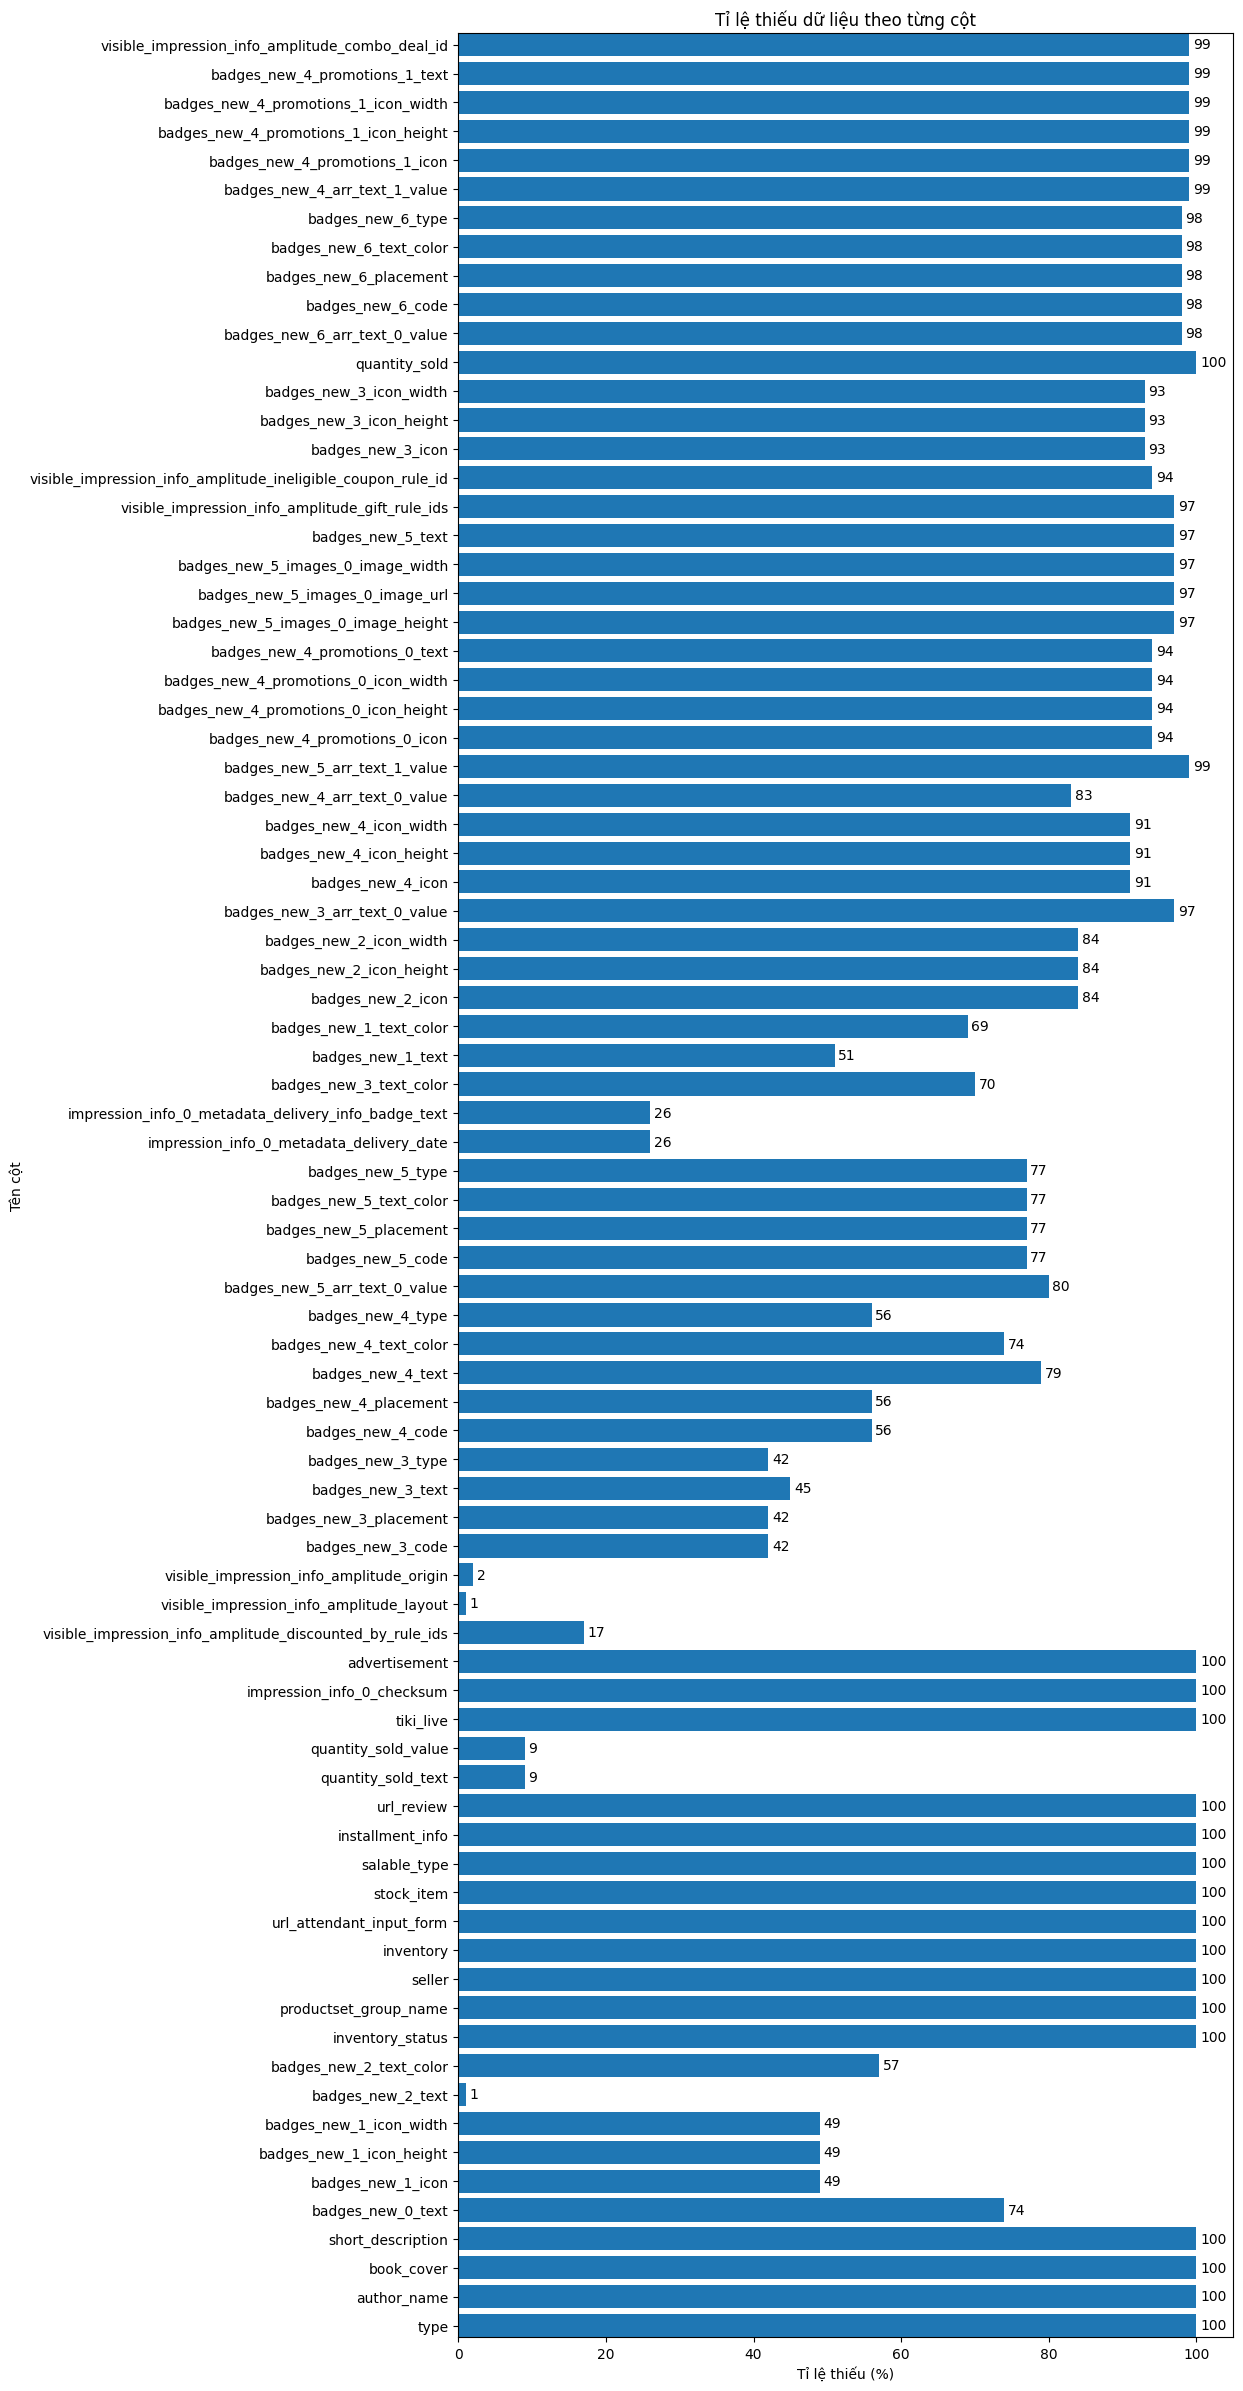

In [11]:
missing_ratio = (missing_summary / len(df)) * 100

plt.figure(figsize=(10, len(missing_ratio) * 0.3))
bars = plt.barh(missing_ratio.index, missing_ratio.values)

plt.xlabel("Tỉ lệ thiếu (%)")
plt.ylabel("Tên cột")
plt.title("Tỉ lệ thiếu dữ liệu theo từng cột")

for bar, val in zip(bars, missing_summary.values):
    plt.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height()/2,
        str(val),
        va='center'
    )
plt.margins(y=0)
plt.subplots_adjust(top=0.98, bottom=0.02)
plt.show()

# ***CLEANING***

***Bước làm sạch dữ liệu***

Xử lý giá trị thiếu (missing values)

Nếu cột thiếu toàn bộ hoặc >95% thì drop.
Nếu cột quan trọng nhưng thiếu ít → thay thế (mean/median cho số, mode cho categorical).

In [12]:
# Ngưỡng drop cột theo tỷ lệ thiếu
MISSING_COL_THRESHOLD = 0.95  # >95% thiếu thì drop

def strip_accents_lower(s):
    if pd.isna(s): return s
    s = str(s).strip().lower()
    nfkd = unicodedata.normalize("NFKD", s)
    return "".join([c for c in nfkd if not unicodedata.combining(c)])

def to_num(x):
    """Bóc tách số từ chuỗi (ưu tiên VNĐ là số nguyên), lỗi -> NaN."""
    if pd.isna(x): return np.nan
    s = str(x)
    try:
        return float(s)
    except:
        pass
    s = re.sub(r"[^\d.]", "", s)
    if s.count(".") > 1:  # nghi ngờ dấu . là ngăn cách nghìn
        s = s.replace(".", "")
    try:
        return float(s) if s else np.nan
    except:
        return np.nan

print("Kích thước ban đầu:", df.shape)

Kích thước ban đầu: (100, 188)


In [13]:
def parse_price(x):
    """Giữ lại chữ số và chuyển về float; trống -> NaN."""
    if pd.isna(x):
        return np.nan
    s = re.sub(r"[^\d]", "", str(x))
    return float(s) if s else np.nan

def strip_accents_lower(s):
    """Chuẩn hóa text: bỏ dấu, lowercase, strip khoảng trắng."""
    if pd.isna(s):
        return s
    s = str(s).strip().lower()
    nfkd = unicodedata.normalize("NFKD", s)
    return "".join([c for c in nfkd if not unicodedata.combining(c)])

In [14]:
df_clean = df.copy()

In [15]:
# Drop cột có tỷ lệ thiếu > ngưỡng

null_ratio = df_clean.isna().mean()
drop_cols = list(null_ratio[null_ratio > MISSING_COL_THRESHOLD].index)
df_clean = df_clean.drop(columns=drop_cols)
print(f"Đã drop {len(drop_cols)} cột thiếu > {int(MISSING_COL_THRESHOLD*100)}%")
print("Sau drop cột:", df_clean.shape)

Đã drop 35 cột thiếu > 95%
Sau drop cột: (100, 153)


In [16]:
for key_col in ["id","name"]:
    if key_col in df_clean.columns:
        before = len(df_clean)
        df_clean = df_clean[df_clean[key_col].notna()]
        print(f"Loại {before-len(df_clean)} hàng thiếu '{key_col}'")

Loại 0 hàng thiếu 'id'
Loại 0 hàng thiếu 'name'


In [17]:
if "id" in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=["id"])
    print("Drop duplicates theo 'id':", before - len(df_clean))
elif set(["name","brand_name"]).issubset(df_clean.columns):
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=["name","brand_name"])
    print("Drop duplicates theo (name, brand_name):", before - len(df_clean))

print("Kích thước hiện tại:", df_clean.shape)

Drop duplicates theo 'id': 0
Kích thước hiện tại: (100, 153)


In [18]:
for col in ["price", "list_price"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(parse_price)

In [19]:
if set(["price","list_price"]).issubset(df_clean.columns):
    df_clean["discount_percent"] = np.where(
        df_clean["list_price"].gt(0) & df_clean["price"].notna(),
        (df_clean["list_price"] - df_clean["price"]) / df_clean["list_price"] * 100.0,
        np.nan
    )

In [20]:
def choose_best_column(frame, candidates):
    avail = [c for c in candidates if c in frame.columns]
    if not avail: return None
    nn = {c: frame[c].notna().sum() for c in avail}
    return max(nn, key=nn.get)

def coalesce(series_list):
    out = None
    for s in series_list:
        if s is None: 
            continue
        out = s if out is None else out.combine_first(s)
    return out

price_candidates      = ["price","final_price","sale_price","deal_price","current_price","best_price"]
list_price_candidates = ["list_price","original_price","price_before_discount","regular_price","old_price","reference_price"]
rate_candidates       = ["discount_rate","discount_percent","discountPercentage","discount_percent_api"]
abs_disc_candidates   = ["discount","discount_amount","price_discount","saved_amount"]

price_col      = choose_best_column(df_clean, price_candidates)
list_price_col = choose_best_column(df_clean, list_price_candidates)
rate_col       = choose_best_column(df_clean, rate_candidates)
abs_col        = choose_best_column(df_clean, abs_disc_candidates)

print("Cột phát hiện:")
print(" - price      :", price_col)
print(" - list_price :", list_price_col)
print(" - rate(%)    :", rate_col)
print(" - discount₫  :", abs_col)

# Ép kiểu số
if price_col:      df_clean["_price_fix"]      = pd.to_numeric(df_clean[price_col].map(to_num), errors="coerce")
if list_price_col: df_clean["_list_price_fix"] = pd.to_numeric(df_clean[list_price_col].map(to_num), errors="coerce")
if rate_col:       df_clean["_rate_fix"]       = pd.to_numeric(df_clean[rate_col].map(to_num), errors="coerce")
if abs_col:        df_clean["_disc_abs_fix"]   = pd.to_numeric(df_clean[abs_col].map(to_num), errors="coerce")

# Ưu tiên 1
dp1 = None
if price_col and list_price_col:
    lp = df_clean["_list_price_fix"]; pr = df_clean["_price_fix"]
    with np.errstate(divide='ignore', invalid='ignore'):
        dp1 = (lp - pr) / lp * 100.0
        dp1 = dp1.where((lp > 0) & pr.notna())

# Ưu tiên 2
dp2 = None
if rate_col:
    r = df_clean["_rate_fix"]
    dp2 = pd.to_numeric(np.where(r <= 1.0, r * 100.0, r), errors="coerce")

# Ưu tiên 3
dp3 = None
if abs_col and list_price_col:
    lp = df_clean["_list_price_fix"]; da = df_clean["_disc_abs_fix"]
    with np.errstate(divide='ignore', invalid='ignore'):
        dp3 = pd.to_numeric(da / lp * 100.0, errors="coerce").where(lp > 0)

# Gộp & làm sạch
dp = coalesce([dp1, pd.Series(dp2) if dp2 is not None else None, dp3])
if dp is not None:
    dp = pd.to_numeric(dp, errors="coerce").clip(-5, 100).round(2)
    df_clean["discount_percent"] = dp
else:
    df_clean["discount_percent"] = np.nan

print("Số dòng có discount_percent:", int(df_clean["discount_percent"].notna().sum()), "/", len(df_clean))


Cột phát hiện:
 - price      : price
 - list_price : list_price
 - rate(%)    : discount_rate
 - discount₫  : discount
Số dòng có discount_percent: 100 / 100


In [21]:
for col in ["name", "brand_name", "url_key", "url_path"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).map(strip_accents_lower)

In [22]:
if "brand_name" in df_clean.columns:
    df_clean["brand_clean"] = df_clean["brand_name"].str.replace(r"[^a-z0-9]+", " ", regex=True).str.strip()

df_clean[["price","list_price","discount_percent"]].head(3) if "price" in df_clean.columns else df_clean.head(3)

,price,list_price,discount_percent
0,300800.0,0.0,50.0
1,4470000.0,0.0,14.0
2,329000.0,0.0,6.0


Xử lý missing còn lại

Numeric: điền median

Categorical: điền mode

-> Chỉ áp dụng cho các cột KHÔNG phải khóa/id/text quan trọng

In [23]:
from pandas.api.types import is_numeric_dtype

In [24]:
# Cột không nên đụng tới khi fill (nếu tồn tại)
do_not_touch = set([c for c in ["id","sku","url_key","url_path"] if c in df_clean.columns])

num_cols = [c for c in df_clean.columns if is_numeric_dtype(df_clean[c]) and c not in do_not_touch]
cat_cols = [c for c in df_clean.columns if not is_numeric_dtype(df_clean[c]) and c not in do_not_touch]

In [25]:
# Fill numeric bằng median (nếu còn dữ liệu hợp lệ)
for c in num_cols:
    if df_clean[c].isna().any():
        if df_clean[c].notna().any():  # có ít nhất 1 giá trị không NaN
            med = df_clean[c].median(skipna=True)
            df_clean[c] = df_clean[c].fillna(med)
        else:
            print(f"Cột {c} toàn NaN, không thể tính median.")

# Fill categorical bằng mode (nếu có mode hợp lệ)
for c in cat_cols:
    if df_clean[c].isna().any():
        mode_vals = df_clean[c].mode(dropna=True)
        if not mode_vals.empty:
            df_clean[c] = df_clean[c].fillna(mode_vals.iloc[0])
        else:
            print(f"Cột {c} toàn NaN, không thể tính mode.")

print("Đã fill missing cho numeric & categorical (ổn định hơn).")

Đã fill missing cho numeric & categorical (ổn định hơn).


In [26]:
print("Kích thước cuối:", df_clean.shape)

# Thống kê cột còn thiếu sau fill
missing_left = df_clean.isna().sum()
missing_left = missing_left[missing_left > 0].sort_values(ascending=False)
print("Cột còn thiếu (top 15):")
print(missing_left.head(15))

# Sắp xếp cột: ưu tiên cột hay dùng lên đầu (nếu có)
preferred = [c for c in ["id","sku","name","brand_name","brand_clean","price","final_price","list_price","original_price","discount_percent","url_key","url_path"] if c in df_clean.columns]
rest = [c for c in df_clean.columns if c not in preferred]
df_clean = df_clean[preferred + rest]

Kích thước cuối: (100, 159)
Cột còn thiếu (top 15):
Series([], dtype: int64)


In [27]:
df = df_clean.copy()

In [28]:
df.head(10)

,id,sku,name,brand_name,brand_clean,price,list_price,original_price,discount_percent,url_key,...,badges_new_4_promotions_0_icon_width,badges_new_4_promotions_0_text,visible_impression_info_amplitude_ineligible_coupon_rule_id,badges_new_3_icon,badges_new_3_icon_height,badges_new_3_icon_width,_price_fix,_list_price_fix,_rate_fix,_disc_abs_fix
0,277980303,4750768275106,loa momo thong bao chuyen khoan - tang khay qr...,momo,momo,300800.0,0.0,600000,50.0,loa-momo-thong-bao-chuyen-khoan-tang-khay-qrco...,...,16.0,Giảm 10K,3344543.5,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,300800.0,0.0,50.0,299200.0
1,277820438,6626294220372,loa bluetooth jbl charge 6 - hang chinh hang,jbl,jbl,4470000.0,0.0,5190000,14.0,loa-bluetooth-jbl-charge-6-hang-chinh-hang-p27...,...,16.0,Giảm 10K,3344543.5,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,4470000.0,0.0,14.0,720000.0
2,277615987,5303786037377,loa bluetooth ngoai troi xiaomi bhr4802gl | ch...,xiaomi,xiaomi,329000.0,0.0,349000,6.0,loa-bluetooth-ngoai-troi-xiaomi-bhr4802gl-chon...,...,16.0,Giảm 10K,3344543.5,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,329000.0,0.0,6.0,20000.0
3,277548884,1400365236556,loa vi tinh đe ban super bass cuc đa dong loa ...,luckyjqr,luckyjqr,276360.0,0.0,300000,8.0,loa-vi-tinh-de-ban-super-bass-cuc-da-dong-loa-...,...,16.0,Giảm 10K,3344543.5,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,276360.0,0.0,8.0,23640.0
4,277468981,5932807198908,"loa bluetooth mini karaoke khong day, kem 2 mi...",miniin,miniin,157000.0,0.0,157000,0.0,loa-bluetooth-mini-karaoke-khong-day-kem-2-mic...,...,16.0,Giảm 10K,3344543.5,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,157000.0,0.0,0.0,0.0
5,277369759,6207346077664,"loa bluetooth chu g led rgb, sac nhanh khong d...",miniin,miniin,149000.0,0.0,149000,0.0,loa-bluetooth-chu-g-led-rgb-sac-nhanh-khong-da...,...,16.0,Giảm 10K,3344543.5,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,149000.0,0.0,0.0,0.0
6,276582252,4345964729037,loa bluetooth anker soundcore 3 a3117 - hang c...,anker,anker,1930000.0,0.0,1990000,3.0,loa-bluetooth-anker-soundcore-3-a3117-hang-chi...,...,16.0,Giảm 10K,3344543.5,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,1930000.0,0.0,3.0,60000.0
7,276566181,5592622754319,"loa may tinh e1002 dung cho may tinh ban, pc, ...",doron,doron,78000.0,0.0,78000,0.0,loa-may-tinh-e1002-dung-cho-may-tinh-ban-pc-la...,...,16.0,Giảm 10K,3344543.5,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,78000.0,0.0,0.0,0.0
8,276386509,3153894260151,loa vi tinh soundbar q2 cho may tinh laptop ha...,tech77,tech77,242000.0,0.0,250000,3.0,loa-vi-tinh-soundbar-q2-cho-may-tinh-laptop-ha...,...,16.0,Giảm 10K,3344543.5,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,242000.0,0.0,3.0,8000.0
9,276075466,2663462605079,[new arrival] loa bluetooth marshall willen ii...,marshall,marshall,2960000.0,0.0,2990000,100.0,new-arrival-loa-bluetooth-marshall-willen-ii-p...,...,16.0,Giảm 10K,3344543.5,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,2960000.0,0.0,1.0,30000.0


Lọc các cột chỉ để lại các cột phục vụ cho đề tài

In [29]:
# chọn cột quan trọng
keep_cols = [
    c
    for c in [
        "id",
        "name",
        "brand_clean",
        "brand_name",
        "price",
        "list_price",
        "discount_percent",
        "image_path",
        "thumbnail_url",
        "rating_average",
        "seller_product_id",
        "quantity_sold_value"
    ]
    if c in df_clean.columns
]
df_core = df_clean[keep_cols].copy()

# --- tạo cột brand: ưu tiên brand_clean nếu có ---
if "brand_clean" in df_core.columns:
    df_core["brand"] = df_core["brand_clean"]
elif "brand_name" in df_core.columns:
    df_core["brand"] = df_core["brand_name"]

# --- bỏ hẳn brand_name & brand_clean để không trùng lặp ---
df_core = df_core.drop(
    columns=[c for c in ["brand_clean", "brand_name"] if c in df_core.columns]
)

# --- chuẩn hóa số cho price ---
if "price" in df_core.columns:
    df_core["price"] = pd.to_numeric(df_core["price"].map(to_num), errors="coerce")

# --- loại bỏ list_price và discount_percent nếu toàn NaN/0 ---
for col in ["list_price", "discount_percent"]:
    if col in df_core.columns:
        if df_core[col].isna().all() or (df_core[col].fillna(0) == 0).all():
            df_core = df_core.drop(columns=[col])
            print(f"Đã drop {col} vì toàn NaN/0")

# --- loại bản ghi không có image_path ---
if "image_path" in df_core.columns:
    before = len(df_core)
    df_core = df_core[df_core["image_path"].astype(str).str.strip().ne("")]
    print("Loại hàng thiếu image_path:", before - len(df_core))

# --- drop trùng theo id nếu có ---
if "id" in df_core.columns:
    before = len(df_core)
    df_core = df_core.drop_duplicates(subset=["id"])
    print("Drop duplicates theo id:", before - len(df_core))

# --- sắp xếp cột chính ---
preferred = [
    c for c in ["id", "name", "brand", "image_path", "thumbnail_url"] if c in df_core.columns
]
rest = [c for c in df_core.columns if c not in preferred]
df_core = df_core[preferred + rest]

print("Kích thước sau rút gọn:", df_core.shape)
df_core.head(10)

Đã drop list_price vì toàn NaN/0
Loại hàng thiếu image_path: 0
Drop duplicates theo id: 0
Kích thước sau rút gọn: (100, 10)


,id,name,brand,image_path,thumbnail_url,price,discount_percent,rating_average,seller_product_id,quantity_sold_value
0,277980303,loa momo thong bao chuyen khoan - tang khay qr...,momo,images/speaker/product_277980303.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,300800.0,50.0,5.0,277980304,54.0
1,277820438,loa bluetooth jbl charge 6 - hang chinh hang,jbl,images/speaker/product_277820438.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,4470000.0,14.0,0.0,277820446,3.0
2,277615987,loa bluetooth ngoai troi xiaomi bhr4802gl | ch...,xiaomi,images/speaker/product_277615987.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,329000.0,6.0,4.3,277615988,7.0
3,277548884,loa vi tinh đe ban super bass cuc đa dong loa ...,luckyjqr,images/speaker/product_277548884.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,276360.0,8.0,0.0,277548885,3.0
4,277468981,"loa bluetooth mini karaoke khong day, kem 2 mi...",miniin,images/speaker/product_277468981.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,157000.0,0.0,3.5,277468983,7.0
5,277369759,"loa bluetooth chu g led rgb, sac nhanh khong d...",miniin,images/speaker/product_277369759.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,149000.0,0.0,3.5,277369760,12.0
6,276582252,loa bluetooth anker soundcore 3 a3117 - hang c...,anker,images/speaker/product_276582252.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,1930000.0,3.0,0.0,276582260,1.0
7,276566181,"loa may tinh e1002 dung cho may tinh ban, pc, ...",doron,images/speaker/product_276566181.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,78000.0,0.0,5.0,276566183,5.0
8,276386509,loa vi tinh soundbar q2 cho may tinh laptop ha...,tech77,images/speaker/product_276386509.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,242000.0,3.0,5.0,275177892,29.0
9,276075466,[new arrival] loa bluetooth marshall willen ii...,marshall,images/speaker/product_276075466.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,2960000.0,100.0,5.0,275946075,14.0


In [30]:
df = df_core.copy()

In [31]:
df.to_excel("data_cleaned/speaker.xlsx", index=False)

OSError: Cannot save file into a non-existent directory: 'data_cleaned'